## 버전문제 링크 (확인해 보세요!)
- https://colab.research.google.com/drive/1udz5wRLf9OW-NNb023LwZ3EK1n2KNwWl

## 0.회귀 분석의 종류

In [24]:
#target(Y)
#분류 분석 : 범주형, 혈액형(A, B, O, AB), 성별(F, M), 숫자(0, 1, ~ 9)
#회귀 분석 : 연속형, 판매량(0, 1, 2, 3, ... 100, 101, 102..)
#   주어진 값보다 더 큰값, 작은값, 사잇값 등이 있을 수 있는 것

### Simple Linear Regression
- 단순 선형 회귀
- $y = \beta_{0} + \beta_{1} x + \epsilon$
- 하나의 X 값을 가지고 Y를 예측하는 것

### Multiple Linear Regression
- 다중 회귀
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 여러 개의 X 값을 가지고 Y를 예측하는 것

### Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

### Ridge, Lasso Regression
- 독립변수들 간에 높은 상관 관계가 있는 경우 규제화 (regularization)를 적용해 모델의 복잡도를 줄임
- Ridge : 계수값을 0 에 가깝게 만들지만 0 이 되지 않음
- Lasso : 계수 값을 0으로 만들 수 있음

## 1.데이터 만들기

### 1-1.함수 만들기

In [25]:
# X : 키, 몸무게
# Y : BMI 예측

In [26]:
import pandas as pd
import numpy as np

In [27]:
# https://rfriend.tistory.com/284
# https://rfriend.tistory.com/352
# https://namu.wiki/w/%ED%82%A4(%EC%8B%A0%EC%B2%B4)
# https://123dok.co/document/eqodvrmz-%EC%A7%80%EC%97%AD%EC%A0%81-%EA%B1%B4%EA%B0%95%EB%B6%88%ED%8F%89%EB%93%B1%EA%B3%BC-%EA%B0%9C%EC%9D%B8-%EB%B0%8F-%EC%A7%80%EC%97%AD%EC%88%98%EC%A4%80%EC%9D%98-%EA%B1%B4%EA%B0%95%EA%B2%B0%EC%A0%95%EC%9A%94%EC%9D%B8.html

In [28]:
# bmi = 몸무게(kg) ÷ (신장(m) × 신장(m))
# 한국 표준 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
# startno : ID의 시작 번호
# outlier : 이상치 비율, 0.01 => 100개 정상데이터 1개 이상치
def make_sample(seedno,size,startno=100,outlier=0):
  np.random.seed(seedno)
  outlier_len = int(size*outlier)
  sizeh = size//2
   # 키의 단위 cm
  hm = np.random.normal(loc=175,scale=5.3,size=sizeh+1 if size%2 else sizeh).round(1)
  hw = np.random.normal(loc=162,scale=5.2,size = sizeh).round(1)
  h = np.concatenate([hm,hw])
  h /= 100   # 단위를 m로 변경
  bmi = np.random.normal(loc=23,scale=4,size=(len(h)))
  w = h*h*bmi
  bmi = (w /(h*h)).round(2)
  h *= 100   # 단위를 cm로 변경
  data = np.column_stack([h,w,bmi])

 # 이상치 데이터 추가
  if outlier_len !=0:
      data_outlier = make_outlier(seedno,outlier_len)
      print(data_outlier,data_outlier.shape,sep='\n')
      data = np.concatenate([data,data_outlier])

  # 'ID'를 포함한 DataFrame 생성 및 반환
  data = pd.DataFrame(data,columns=['height','weight','BMI'])
  data = data.sample(frac=1)
  data.insert(0,'ID',np.arange(startno,startno+len(data),dtype='int'))
  return data

In [29]:
# bmi = #몸무게(kg) ÷ (신장(m) × 신장(m))
# 키, 몸무게가 매우 작거나 큰 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수

def make_outlier(seedno,size):
  np.random.seed(seedno)
  sizeh = size//2
  hlow = np.random.normal(loc=120,scale=5.3,size = sizeh +1 if size%2 else sizeh).round(1)
  hhigh = np.random.normal(loc=220,scale=5.2, size = sizeh).round(1)
  h = np.concatenate([hlow,hhigh])
  h /= 100
  bmi = np.random.normal(loc=23,scale=10,size=len(h))
  w = (h*h*bmi).round(1)
  bmi = (w/(h*h)).round(2)
  h *= 100
  return np.column_stack([h,w,bmi])



In [30]:
# make_sample 사용연습
df = make_sample(1234,100,outlier=0.05)
df.describe()

[[122.5   47.8   31.85]
 [113.7   40.8   31.56]
 [127.6   27.1   16.64]
 [218.4  110.5   23.17]
 [216.3    2.7    0.58]]
(5, 3)


,ID,height,weight,BMI
count,105.000000,105.000000,105.000000,105.000000
mean,152.000000,168.257143,64.313773,22.702190
std,30.454885,13.442877,16.426088,4.621317
min,100.000000,113.700000,2.700000,0.580000
25%,126.000000,162.200000,52.846576,19.880000
50%,152.000000,167.400000,62.783594,22.940000
75%,178.000000,175.700000,74.539662,25.720000
max,204.000000,218.400000,110.500000,32.460000


### 1-2.train, test 데이터

In [31]:
# [1] train, test 데이터 생성 및 파일로 저장하기
train = make_sample(1234,100)
test = make_sample(1,100,len(train))
Xfeatures = ['ID','height','weight']
Yfeatures = ['ID','BMI']

Xtrain = train[Xfeatures]
Ytrain = train[Yfeatures]

Xtest = test[Xfeatures]
Ytest = test[Yfeatures]

Xtrain.to_csv('x_train.csv', index=False)
Ytrain.to_csv('y_train.csv', index=False)
Xtest.to_csv('x_test.csv', index=False)
Ytest.to_csv('y_test.csv', index=False)

In [32]:
# [2] 각 데이터를 파일에서 읽어오기
# X_use, X_submission, Y, Y_hidden 이름 사용
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [33]:
# X_use, Y를 합쳐서 dfXY 생성
dfXY = pd.merge(X_use,Y)
dfXY.shape

(100, 4)

In [34]:
# dfXY의 상관 관계 확인
dfXY.corr()

,ID,height,weight,BMI
ID,1.000000,0.140693,-0.022953,-0.108384
height,0.140693,1.000000,0.604268,0.179053
weight,-0.022953,0.604268,1.000000,0.887654
BMI,-0.108384,0.179053,0.887654,1.000000


## 2.모델링, 성능평가

### 2-1.모델링 함수

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
# [1] 데이터를 분리하고, 학습 한 뒤, R2_score를 구해 출력
def Model_Train(model,XF,XY,scale=False):
  # 7:3분리, random_state=321 (주의 :stratify 사용 안함 -> 분류 모델에서만 사용)
  if scale:
    XF = MinMaxScaler().fit_transform(XF)
  xtrain,xtest,ytrain,ytest = train_test_split(XF,XY,
                                               test_size=0.3,
                                               random_state=321)

  model.fit(xtrain,ytrain)
  A = model.score(xtrain,ytrain)
  B = model.score(xtest,ytest)
  print(f'{A:.4f} {B:.4f}')
  return model

### 2-2. Multiple Linear Regression
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 오차(잔차)가 가장 적게 발생하는 계수, 절편 찾기

In [37]:
# [2] outlier가 포함되지 않은 경우, LinearRegression 모델 사용
#Temp = make_sample(1234, 100)
Xnormal = X_use[['height','weight']]
Ynormal = Y['BMI']
Xnormal.shape
Ynormal.shape
model = LinearRegression()
Model_Train(model,Xnormal,Ynormal)

0.9931 0.9622


LinearRegression()

In [38]:
# [3] 계수들과 절편 출력해 보기
print(model.coef_,model.intercept_)

[-0.28021506  0.3438107 ] 47.652069656331236


### 2-3.이상치

In [39]:
# [4] 이상치를 포함한 데이터 생성 (outlier=0.07 사용)
Toutlier = make_sample(1234,100,outlier=0.07)
Xoutlier = Toutlier[['height','weight']]
Youtlier = Toutlier['BMI']

[[122.5   25.    16.66]
 [113.7   29.9   23.13]
 [127.6    0.9    0.55]
 [118.3   48.3   34.51]
 [216.3  154.    32.92]
 [224.6  164.1   32.53]
 [224.5   14.     2.78]]
(7, 3)


In [40]:
# [5] 이상치가 포함된 경우, LinearRegression 모델 사용
model2 = LinearRegression()
Model_Train(model2,Xoutlier,Youtlier)

0.9296 0.4553


LinearRegression()

<Axes: >

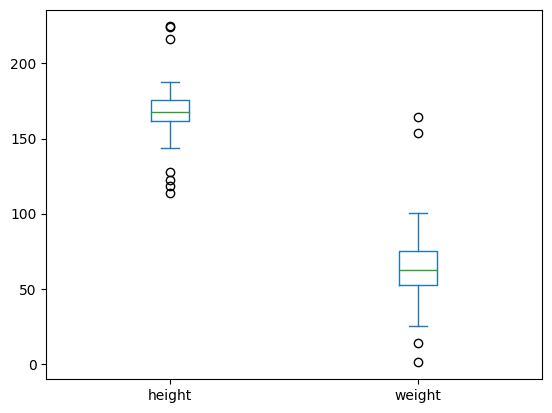

In [41]:
# [6] 그래프 사용하여 이상치 확인
import matplotlib.pyplot as plt
Xoutlier.plot(kind='box')

In [42]:
# [7] 각 feature별 Q1, Q3 확인
Xoutlier.quantile([0.25,0.75])

,height,weight
0.25,162.00,52.794716
0.75,175.85,75.012419


In [43]:
# [8] height에 대한 outlier 확인
Q1,Q3 = Xoutlier['height'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_h = round(Q1 - IQR*1.5,3)
upper_h = round(Q3 + IQR*1.5,3)
print(lower_h,upper_h)

141.225 196.625


In [44]:
# [9] weight에 대한 outlier 확인
Q1,Q3 = Xoutlier['weight'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_w = round(Q1-IQR*1.5,3)
upper_w = round(Q3+IQR*1.5,3)
print(lower_w,upper_w)

19.468 108.339


In [45]:
# [10] height에 대한 outlier 제거 및 학습
height = Xoutlier['height']
outlier_h = Xoutlier[(height<lower_h)|(height>upper_h)]
#print(outlier_h)
Xoutlier_rh = Xoutlier.drop(index=outlier_h.index)
Youtlier_rh = Youtlier.drop(index=outlier_h.index)
#print(Xoutlier_rh.shape,Youtlier_rh.shape)
model_3 = LinearRegression()
Model_Train(model_3,Xoutlier_rh,Youtlier_rh)

0.9867 0.9935


LinearRegression()

In [46]:
# [11] weight에 대한 outlier 제거 및 학습
weight = Xoutlier['weight']
outlier_w = Xoutlier[(weight<lower_w) | (weight>upper_w)]
print(outlier_w)
Xoutlier_rw = Xoutlier.drop(index=outlier_w.index)
Youtlier_rw = Youtlier.drop(index=outlier_w.index)
print(Xoutlier_rw.shape,Youtlier_rw.shape)
model_4 = LinearRegression()
Model_Train(model_4,Xoutlier_rw,Youtlier_rw)

     height  weight
102   127.6     0.9
104   216.3   154.0
105   224.6   164.1
106   224.5    14.0
(103, 2) (103,)
0.9730 0.9216


LinearRegression()